> # Multilinear Regression - 1

## Import the libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Exploratory Data Analysis

In [4]:
data.shape

(50, 5)

In [5]:
data.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [6]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<AxesSubplot:>

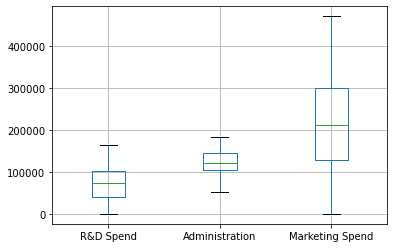

In [8]:
data.boxplot(column=['R&D Spend', 'Administration', 'Marketing Spend'])

Assumptions :
* Linear Relationship between dependent and independent variables
      Scatter Plot, Pair Plot
* No multicollinearity - No dependencies between 2 independent variables
      VIF<3

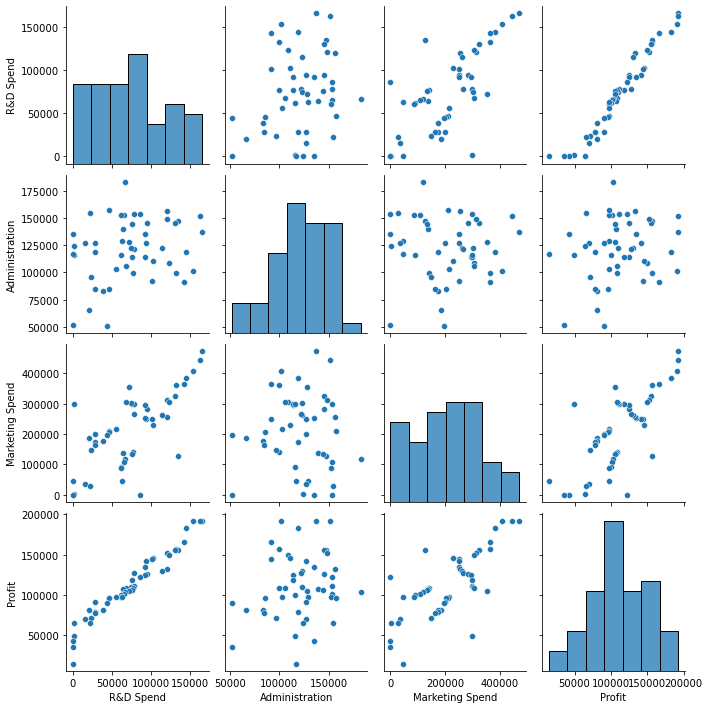

In [9]:
sns.pairplot(data)

## Encoding

In [10]:
data1 = pd.get_dummies(data['State'],drop_first=True)
data1.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [11]:
data = pd.concat([data,data1],axis=1)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [12]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'Florida', 'New York'],
      dtype='object')

In [13]:
col = ['R&D Spend', 'Administration', 'Marketing Spend','Florida', 'New York', 'Profit']
data = data[col]

In [14]:
data.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York,Profit
0,165349.20,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,0,0,191792.06
2,153441.51,101145.55,407934.54,1,0,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,0,166187.94


## Store the value of the feature and the predicting column in seperate arrays

In [15]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [16]:
x[:4]

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00]])

### VIF

In [17]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [18]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York',
       'Profit'],
      dtype='object')

In [19]:
x.columns = ['R&D Spend', 'Administration', 'Marketing Spend', 'Florida', 'New York']
x.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0.0,1.0
1,162597.70,151377.59,443898.53,0.0,0.0
2,153441.51,101145.55,407934.54,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,1.0
4,142107.34,91391.77,366168.42,1.0,0.0


In [20]:
x['INTERCEPT'] = 1

In [21]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['variables'] = x.columns
vif

,variables
0,R&D Spend
1,Administration
2,Marketing Spend
3,Florida
4,New York
5,INTERCEPT


In [22]:
vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,variables,vif
0,R&D Spend,2.495511
1,Administration,1.177766
2,Marketing Spend,2.416797
3,Florida,1.387641
4,New York,1.335061
5,INTERCEPT,26.600153


VIF < 3 - No multicollinearity

In [23]:
# Convert x(DataFrame) back to an array to train it
x = x.values
x[:5]

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

## Split into training and testing set

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## Fit the model

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Find slopes and intercept
* y = b0 + b1x1 + b2x2 + ... + bnxn
* b0 - intercept
* b1,b2,..bn - slope

In [26]:
print(reg.intercept_)
print(reg.coef_)

41049.238094364686
[ 7.80990589e-01  4.57976214e-02  3.35420038e-02 -5.21787358e+02
  1.11511973e+01  0.00000000e+00]


In [27]:
print("Y = ",reg.intercept_," + ",reg.coef_[0],"x1"," + ",reg.coef_[1],"x2"," + ",reg.coef_[2],"x3"," + ",reg.coef_[3],"x4"," + ",reg.coef_[4],"x5")
# 5 features

Y =  41049.238094364686  +  0.7809905888167616 x1  +  0.0457976214379198 x2  +  0.03354200384570456 x3  +  -521.7873582029616 x4  +  11.151197288397096 x5


## Predict the values

In [28]:
y_pred = reg.predict(x_test)

## R2 value

In [29]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100,'%')

93.1581519915206 %


## Predicted vs acual value graph

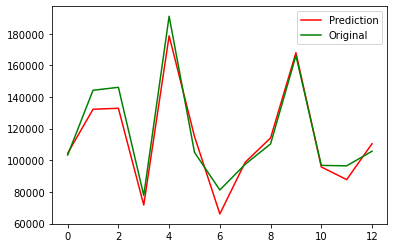

In [30]:
plt.plot(y_pred,c='r',label='Prediction')
plt.plot(y_test,c='g',label='Original')
plt.legend()
plt.show()

> # Multilinear Regression - 2

## Import the libraries and read the dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [32]:
data = pd.read_csv(r'house_price.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Analysing the data
* Remove unwanted columns
* Fill null values for categorical and numerical columns
* Remove outliers
* Check multicollinearity

In [33]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
data.drop(['Id'],axis=1,inplace=True)

In [35]:
data.shape

(1460, 80)

In [36]:
l = data.columns[data.isna().any()]
l

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [37]:
for i in l:
    print(i,data[i].isnull().sum(),data[i].dtypes)

LotFrontage 259 float64
Alley 1369 object
MasVnrType 8 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object


In [38]:
data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [39]:
l = data.columns[data.isna().any()]
l

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [40]:
null_categorical_features = list(data[l].select_dtypes(include='object').columns)
null_numerical_features = list(data[l].select_dtypes(exclude='object').columns)

In [41]:
null_categorical_features, null_numerical_features

(['MasVnrType',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond'],
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [42]:
data[null_categorical_features].nunique()

MasVnrType      4
BsmtQual        4
BsmtCond        4
BsmtExposure    4
BsmtFinType1    6
BsmtFinType2    6
Electrical      5
GarageType      6
GarageFinish    3
GarageQual      5
GarageCond      5
dtype: int64

In [43]:
for i in null_categorical_features:
    print(data[i].value_counts(),'\n')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64 

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64 

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64 

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64 



In [44]:
for i in null_categorical_features:
    data[i].fillna(data[i].value_counts().index[0],inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


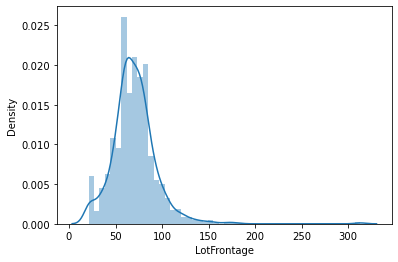

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


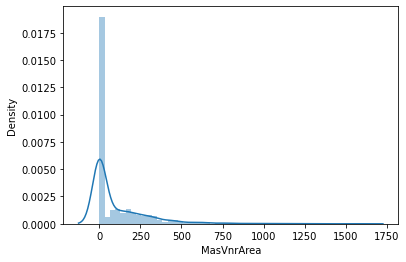

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


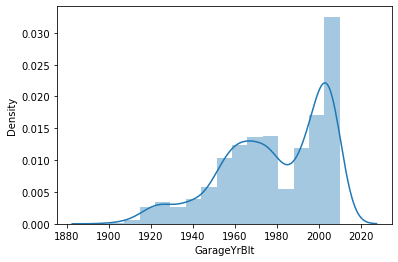

In [45]:
for i in null_numerical_features:
    sns.distplot(data[i])
    plt.show()

In [46]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(),inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)

In [47]:
data.columns[data.isna().any()]

Index([], dtype='object')

All null values have been filled

In [48]:
data.shape

(1460, 75)

In [49]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [50]:
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

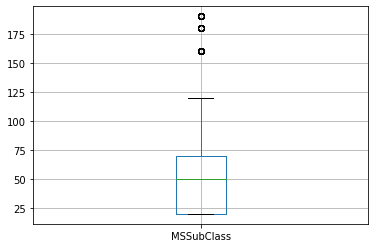

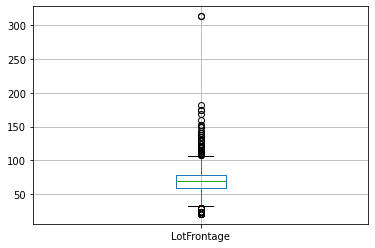

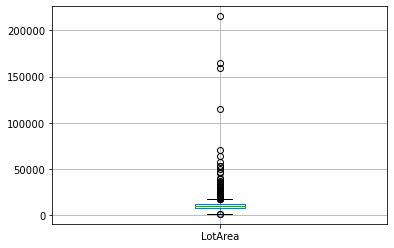

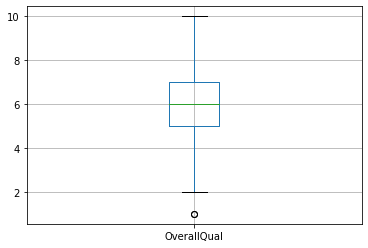

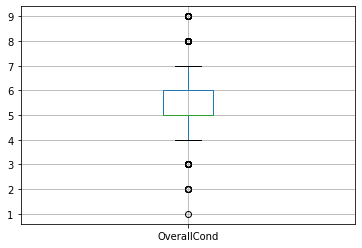

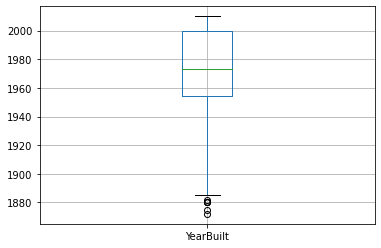

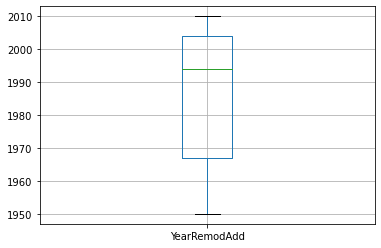

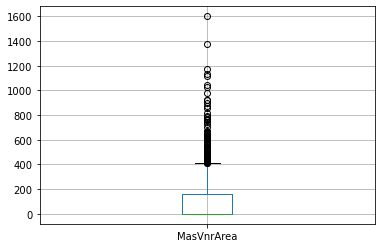

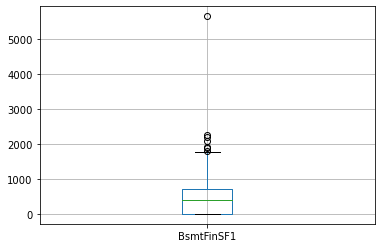

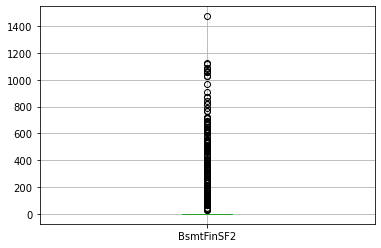

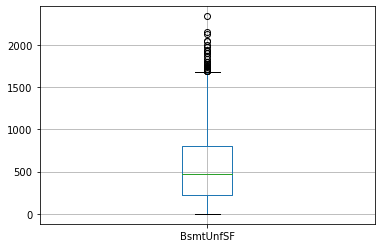

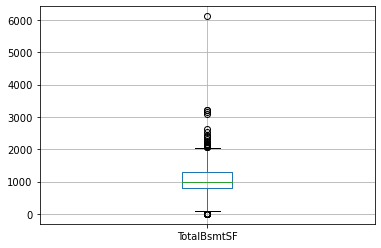

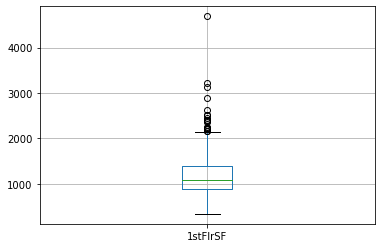

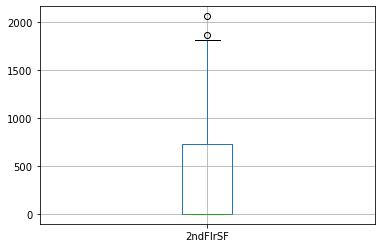

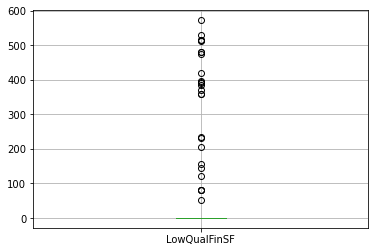

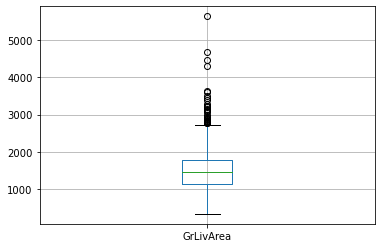

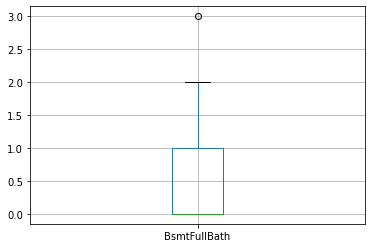

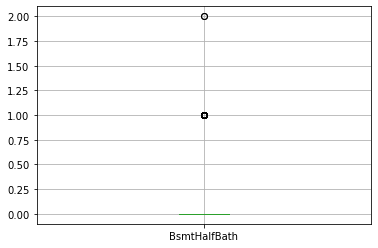

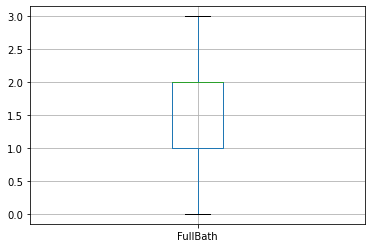

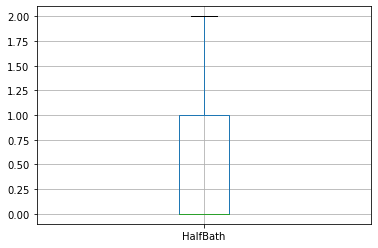

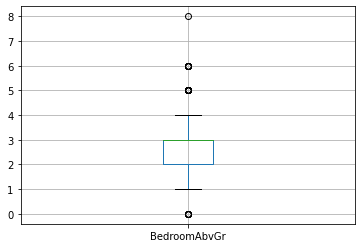

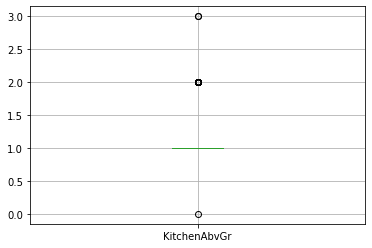

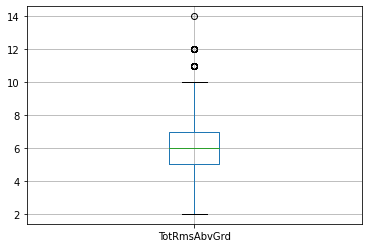

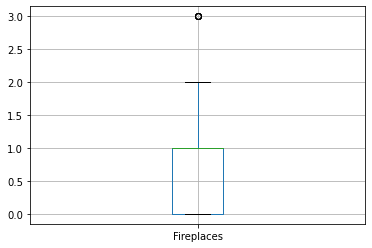

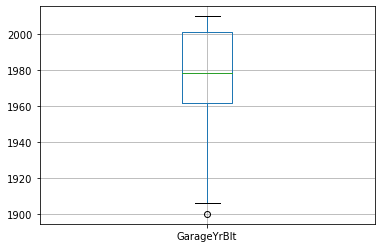

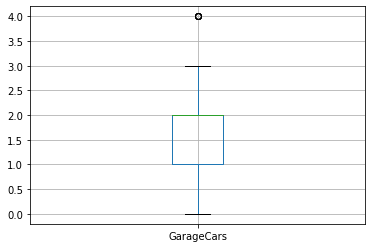

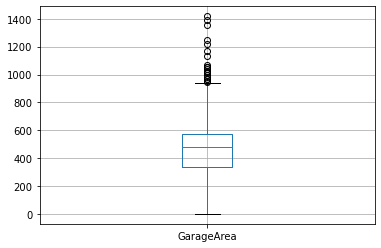

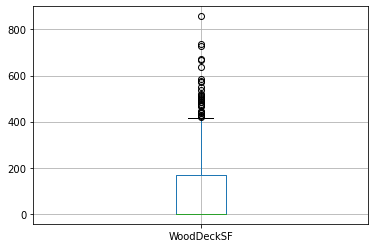

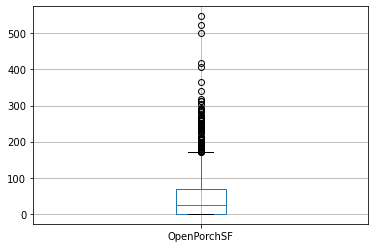

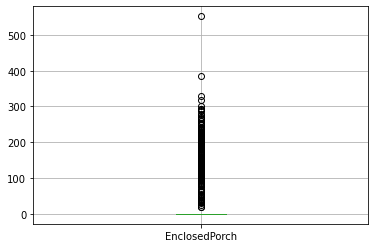

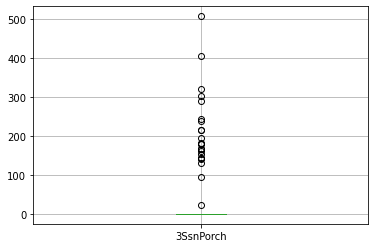

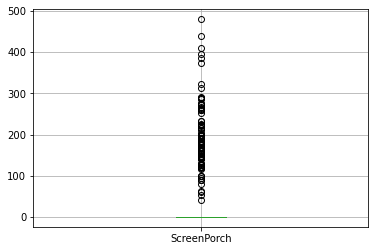

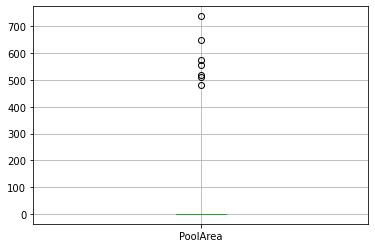

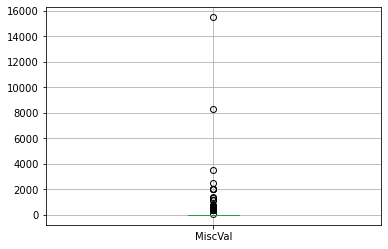

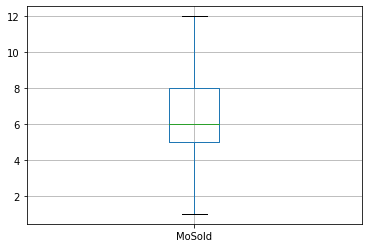

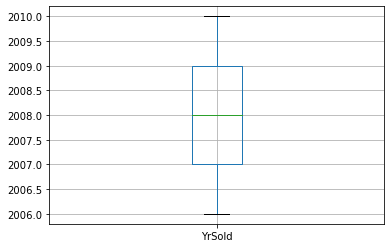

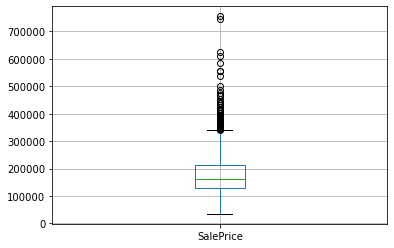

In [51]:
for i in numerical_features:
    data.boxplot(i)
    plt.show()

In [52]:
def iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower = q1-1*iqr
    upper = q3+1*iqr
    data = data[(data[col]>lower) & (data[col]<upper)]
    data.boxplot(numerical_features[i])
    plt.show()

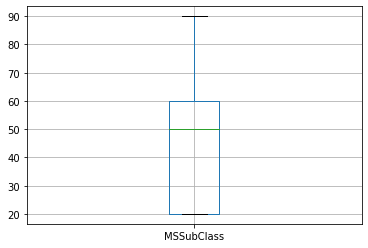

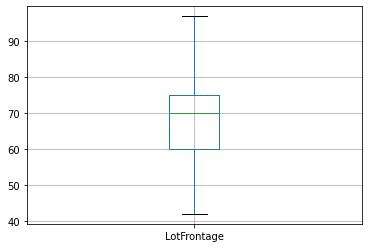

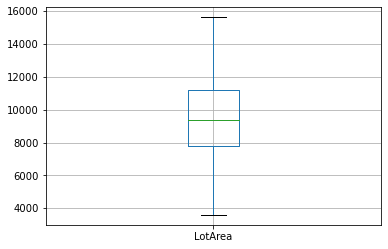

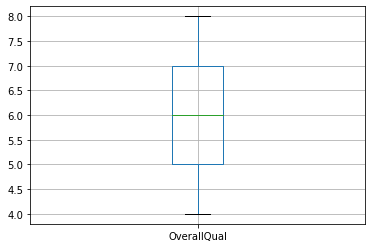

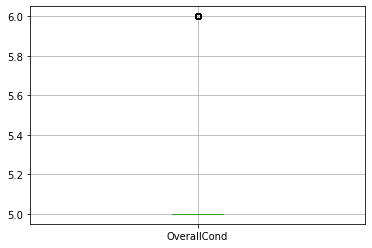

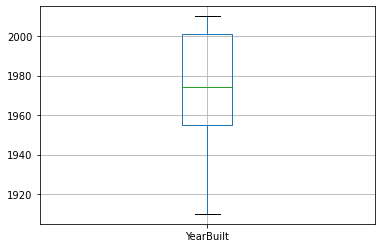

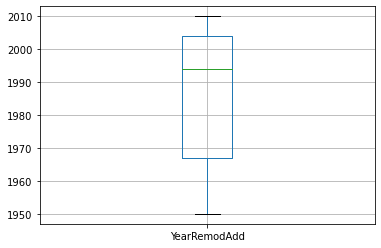

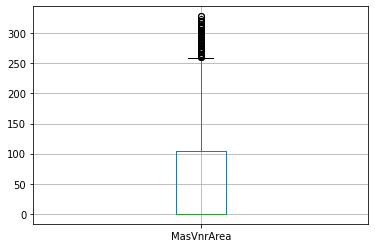

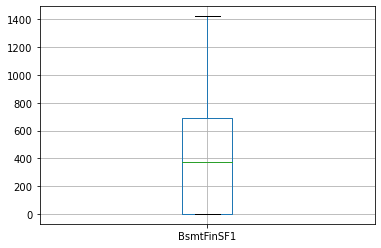

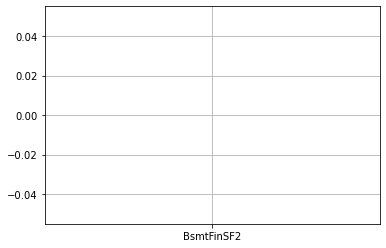

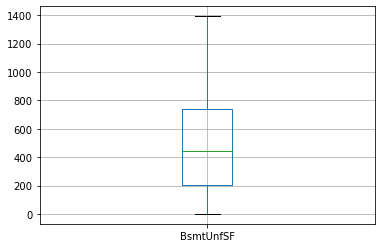

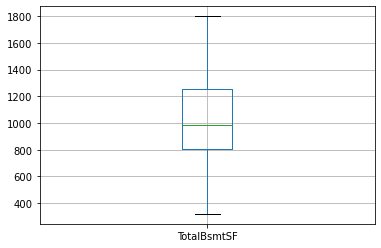

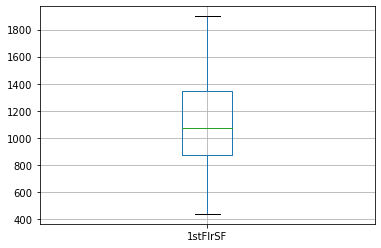

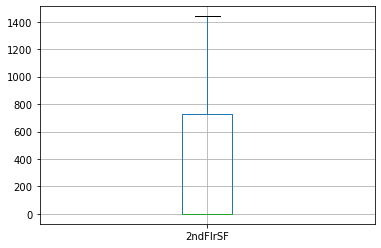

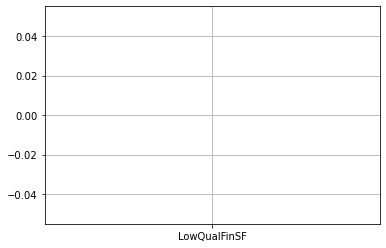

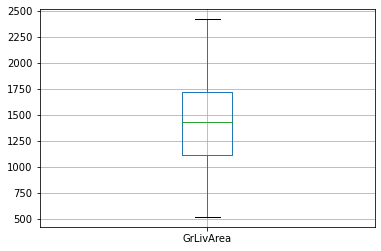

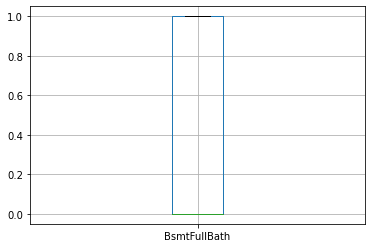

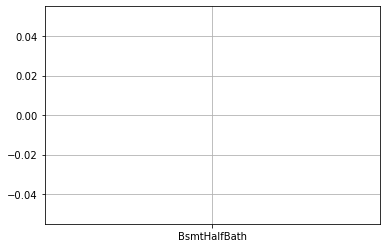

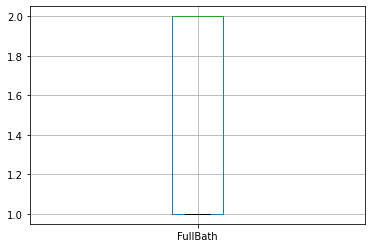

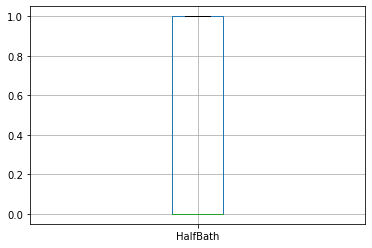

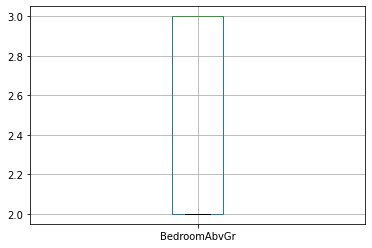

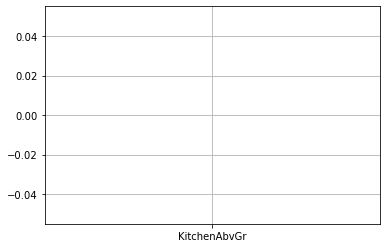

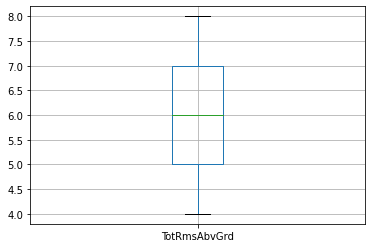

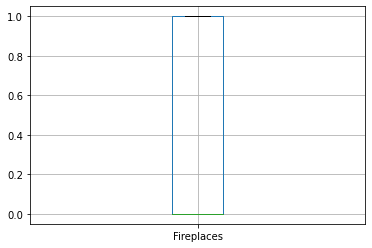

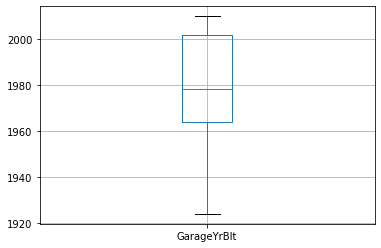

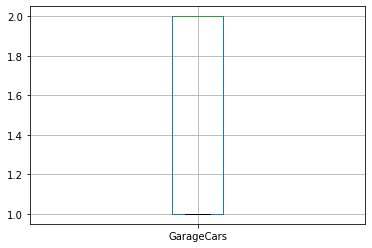

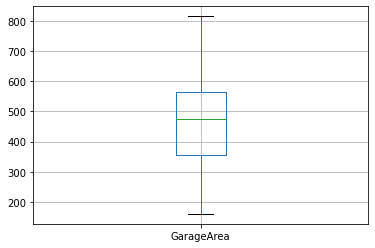

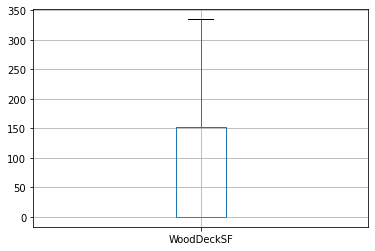

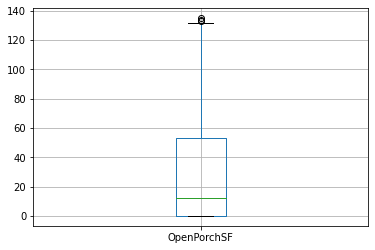

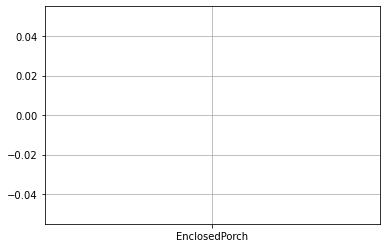

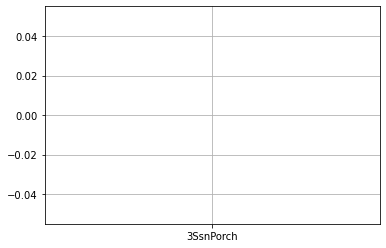

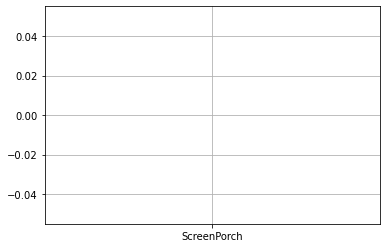

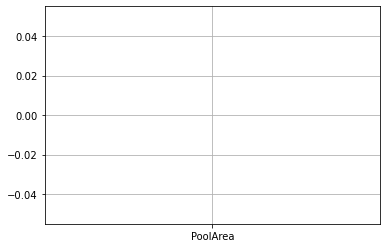

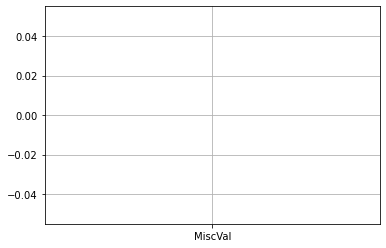

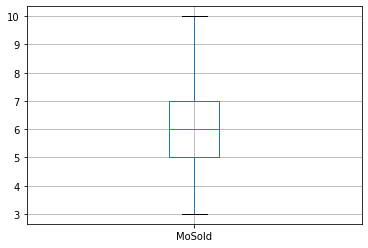

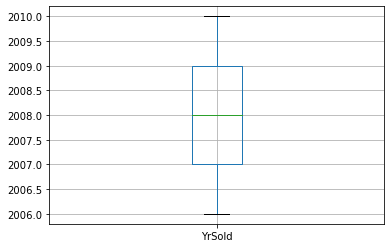

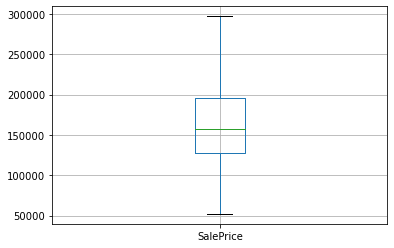

In [53]:
for i in range(len(numerical_features)):
    iqr(data,numerical_features[i])

<AxesSubplot:>

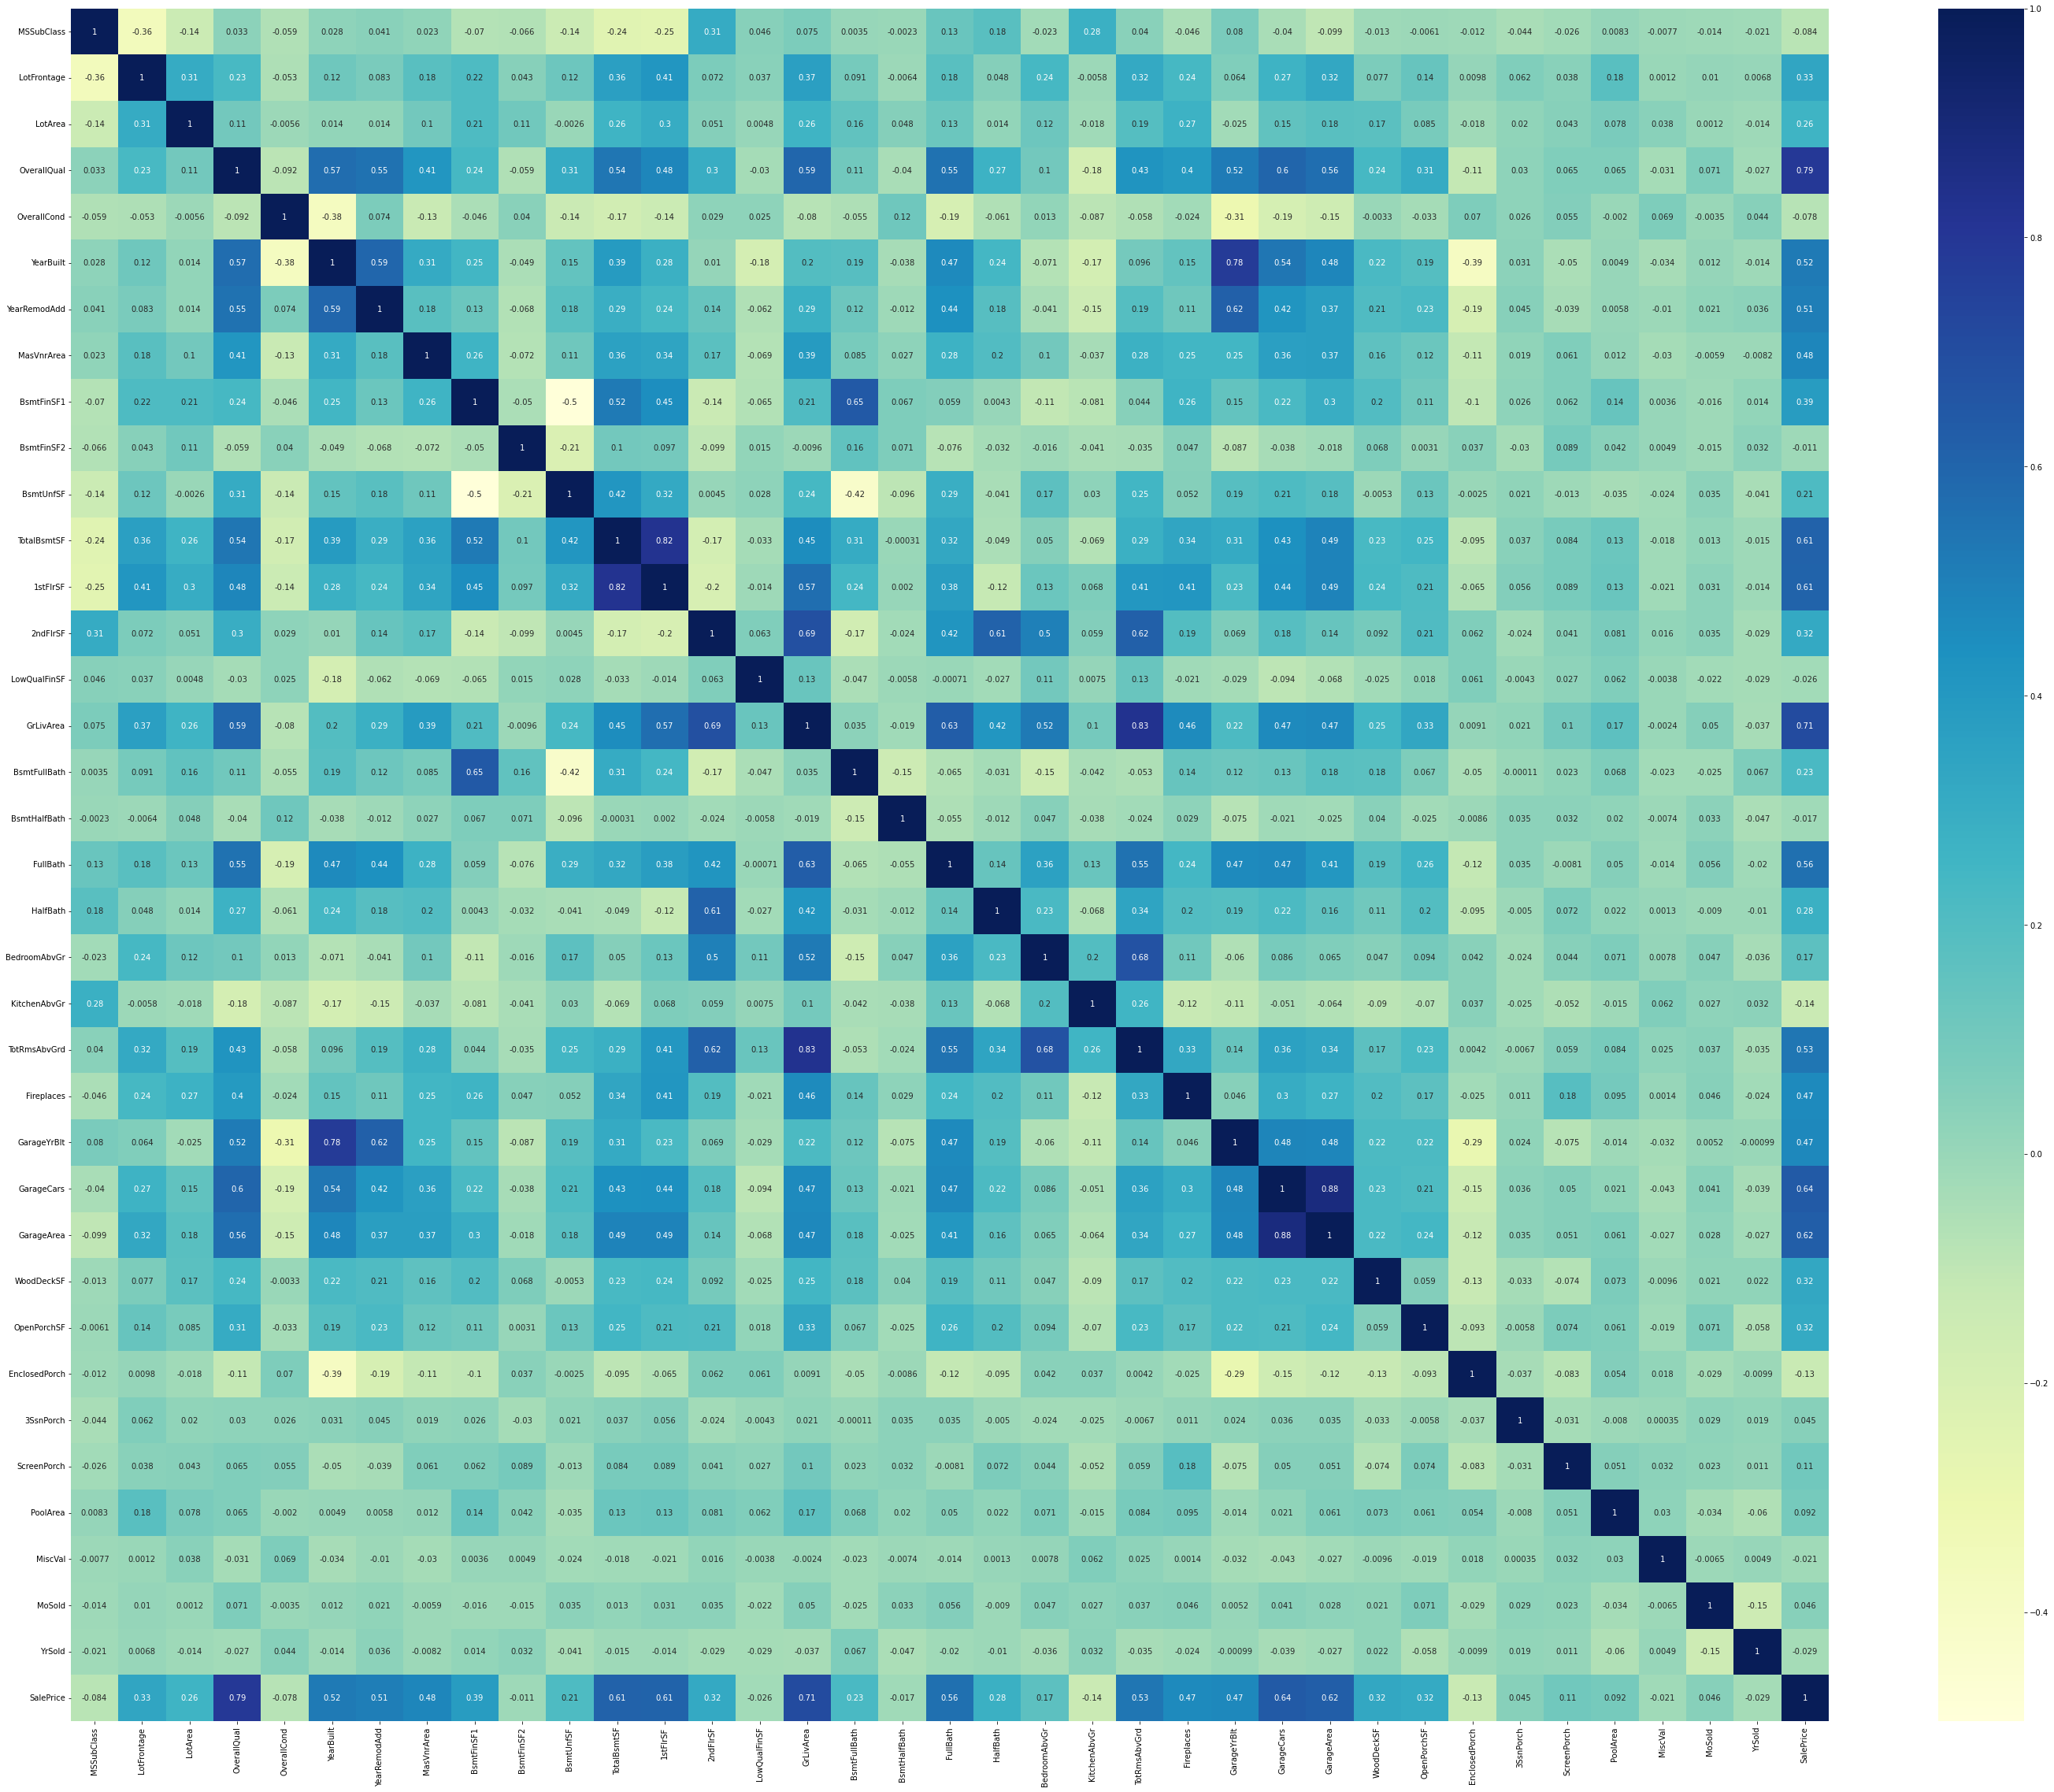

In [54]:
plt.figure(figsize=(50,40))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [55]:
data.drop(['GarageArea'],axis=1,inplace=True)
# GarageArea and GarageCars are highly correlated
# corr(GarageArea) < corr(GarageCars) when compared with target so we remove GarageArea

In [56]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [57]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPor

BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinSF1      637
BsmtFinType2      6
BsmtFinSF2      144
BsmtUnfSF       780
TotalBsmtSF     721
dtype: int64 BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinSF1       int64
BsmtFinType2    object
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
dtype: object


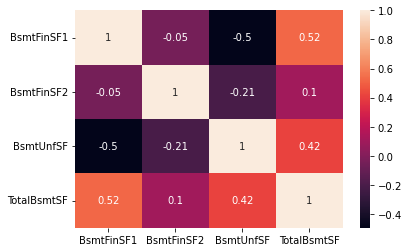

In [58]:
bsmt = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
sns.heatmap(data[bsmt].corr(),annot=True)
print(data[bsmt].nunique(),data[bsmt].dtypes)

BsmtFullBath    4
BsmtHalfBath    3
FullBath        4
HalfBath        3
dtype: int64 BsmtFullBath    int64
BsmtHalfBath    int64
FullBath        int64
HalfBath        int64
dtype: object


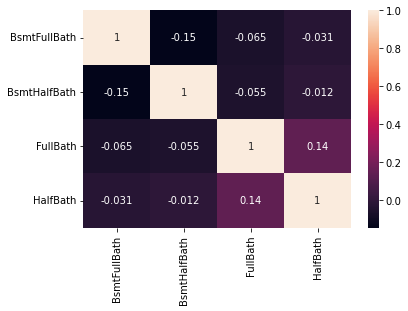

In [59]:
bath = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
sns.heatmap(data[bath].corr(),annot=True)
print(data[bath].nunique(),data[bath].dtypes)

GarageType       6
GarageYrBlt     98
GarageFinish     3
GarageCars       5
GarageQual       5
GarageCond       5
dtype: int64 GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
GarageQual       object
GarageCond       object
dtype: object


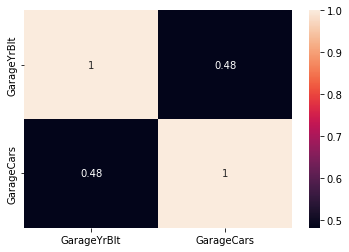

In [60]:
gar = ['GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageQual', 'GarageCond']
sns.heatmap(data[gar].corr(),annot=True)
print(data[gar].nunique(),data[gar].dtypes)

OpenPorchSF      202
EnclosedPorch    120
3SsnPorch         20
ScreenPorch       76
dtype: int64 OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
dtype: object


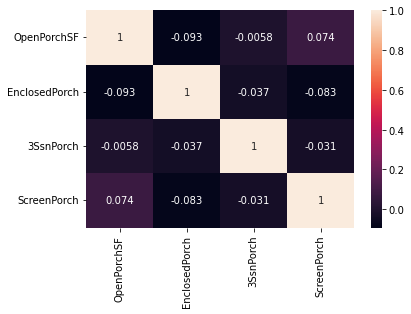

In [61]:
porch = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
sns.heatmap(data[porch].corr(),annot=True)
print(data[porch].nunique(),data[porch].dtypes)

In [62]:
year = [i for i in data if 'Yr' in i or 'Year' in i]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [63]:
data[year].nunique()

YearBuilt       112
YearRemodAdd     61
GarageYrBlt      98
YrSold            5
dtype: int64

In [64]:
data['YearBuilt'] = 2023 - data['YearBuilt'] 
# how many years ago was it built

In [65]:
data['YearRemodAdd'] = 2023 - data['YearRemodAdd'] 
# how many years ago was it remodified

In [66]:
data['GarageYrBlt'] = 2023 - data['GarageYrBlt'] 
# how many years ago was garage built

In [67]:
data['YrSold'] = 2023 - data['YrSold'] 
# how many years ago was it sold

In [68]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,20.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,15,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,47,47,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,47.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,16,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,22,21,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,22.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,15,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,108,53,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,25.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,17,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,23,23,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,23.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,15,WD,Normal,250000


In [69]:
data[categorical_features].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

Drop categorial features with lots of unique value as it is difficult to encode and manage the data - Do not drop if it has some significant importance in predicting the values eg: neighbourhood

In [70]:
data.drop(['Exterior1st','Exterior2nd'],axis=1,inplace=True)

In [71]:
for i in data.columns:
    if data[i].nunique()>50:
        print(i,data[i].dtypes)

LotFrontage float64
LotArea int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
1stFlrSF int64
2ndFlrSF int64
GrLivArea int64
GarageYrBlt float64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
ScreenPorch int64
SalePrice int64


In [72]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [73]:
data.shape

(1460, 72)

## Encoding

In [74]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [75]:
for i in categorical_features:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int8   
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int8   
 5   LotShape       1460 non-null   int8   
 6   LandContour    1460 non-null   int8   
 7   Utilities      1460 non-null   int8   
 8   LotConfig      1460 non-null   int8   
 9   LandSlope      1460 non-null   int8   
 10  Neighborhood   1460 non-null   int8   
 11  Condition1     1460 non-null   int8   
 12  Condition2     1460 non-null   int8   
 13  BldgType       1460 non-null   int8   
 14  HouseStyle     1460 non-null   int8   
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

All the features are now numerical

In [76]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [77]:
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,20.0,20.0,1.0,1.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,20.0,1.0,2.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,8.0,4.0
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,47.0,47.0,1.0,1.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,1.0,47.0,1.0,2.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,4.0
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,22.0,21.0,1.0,1.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,22.0,1.0,2.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,8.0,4.0
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,108.0,53.0,1.0,1.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,5.0,25.0,2.0,3.0,4.0,4.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,17.0,8.0,0.0
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,23.0,23.0,1.0,1.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,1.0,23.0,1.0,3.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,8.0,4.0


In [78]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch

In [79]:
col = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
x.columns = col

In [80]:
x['Intercept']=1
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Intercept
0,60.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,20.0,20.0,1.0,1.0,1.0,196.0,2.0,4.0,2.0,2.0,3.0,3.0,2.0,706.0,5.0,0.0,150.0,856.0,1.0,0.0,1.0,4.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,8.0,6.0,0.0,1.0,20.0,1.0,2.0,4.0,4.0,2.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,8.0,4.0,1
1,20.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6.0,8.0,47.0,47.0,1.0,1.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,1.0,0.0,978.0,5.0,0.0,284.0,1262.0,1.0,0.0,1.0,4.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,6.0,1.0,1.0,47.0,1.0,2.0,4.0,4.0,2.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,4.0,1
2,60.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7.0,5.0,22.0,21.0,1.0,1.0,1.0,162.0,2.0,4.0,2.0,2.0,3.0,2.0,2.0,486.0,5.0,0.0,434.0,920.0,1.0,0.0,1.0,4.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2.0,6.0,6.0,1.0,1.0,22.0,1.0,2.0,4.0,4.0,2.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,8.0,4.0,1
3,70.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7.0,5.0,108.0,53.0,1.0,1.0,2.0,0.0,3.0,4.0,0.0,3.0,1.0,3.0,0.0,216.0,5.0,0.0,540.0,756.0,1.0,2.0,1.0,4.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,7.0,6.0,1.0,5.0,25.0,2.0,3.0,4.0,4.0,2.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,17.0,8.0,0.0,1
4,60.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8.0,5.0,23.0,23.0,1.0,1.0,1.0,350.0,2.0,4.0,2.0,2.0,3.0,0.0,2.0,655.0,5.0,0.0,490.0,1145.0,1.0,0.0,1.0,4.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2.0,9.0,6.0,1.0,1.0,23.0,1.0,3.0,4.0,4.0,2.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,8.0,4.0,1


In [81]:
pd.pandas.set_option('display.max_rows',None)
VIF = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIF['columns'] = x.columns

In [82]:
VIF['vif'] = [vif(x.values,i) for i in range(x.shape[1])]
VIF

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,columns,vif
0,MSSubClass,5.313355
1,MSZoning,1.316282
2,LotFrontage,1.749019
3,LotArea,1.625328
4,Street,1.146650
5,LotShape,1.252544
6,LandContour,1.305399
7,Utilities,1.094876
8,LotConfig,1.140620
9,LandSlope,1.612497


In [83]:
x.drop(['GarageCond'],axis=1,inplace=True) 
x.drop(['TotRmsAbvGrd'],axis=1,inplace=True) 
x.drop(['YearBuilt'],axis=1,inplace=True)
x.drop(['MSSubClass'],axis=1,inplace=True)
x.drop(['OverallQual'],axis=1,inplace=True)
x.drop(['GarageCars'],axis=1,inplace=True)
x.drop(['GarageYrBlt'],axis=1,inplace=True)
x.drop(['BsmtFinType2'],axis=1,inplace=True)

In [84]:
data.drop(['GarageCond','TotRmsAbvGrd','YearBuilt','MSSubClass','OverallQual','GarageCars','GarageYrBlt','BsmtFinType2']
          ,axis=1,inplace=True)

In [85]:
data.shape

(1460, 64)

In [86]:
x.shape

(1460, 64)

## Convert x(DataFrame) back to an array to train it

In [87]:
x = x.values

## Split into training and testing set

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=15)

## Fit the model

In [89]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Find slopes and intercept


In [90]:
print(reg.intercept_)
print(reg.coef_)

22982.833440594055
[-5.47104030e+02 -7.75227407e+01  2.76118331e-01  2.86140409e+04
 -1.13819584e+03  4.60901648e+03 -1.77566051e-08 -8.02535549e+01
  8.54395258e+03  8.54118146e+02  5.10415836e+01 -6.61464279e+03
 -4.50462158e+03 -1.32841798e+03  4.15325395e+03 -1.66350764e+02
  3.11020196e+03  6.51122441e+03  2.18125190e+03  2.06878146e+01
 -1.55317868e+04  2.89232615e+03  1.82349832e+03 -1.42368595e+04
  3.56434400e+03 -3.98548213e+03 -1.36709975e+03 -9.14128430e-01
  4.55516974e+00  1.83722180e+00  5.47826305e+00 -4.62156526e+02
 -1.00624596e+03  7.74617567e+03  4.00109914e+02  3.99762563e+01
  3.02390351e+01 -4.98191549e+01  2.03961364e+01  9.22517171e+03
  2.87357195e+03  1.16666402e+04  2.09794190e+03 -7.88656213e+02
 -1.71279514e+04 -9.76131527e+03  6.00195470e+03  7.51421357e+03
  5.73993855e+01 -3.45550515e+03  1.94387201e+03  5.89393421e+03
  9.91537256e+00 -2.17467968e+01 -8.37256773e+00  2.46479773e+01
  4.31342840e+01 -2.32343608e+01 -4.83873578e+00 -1.00711281e+02
  1.38

## Predict the values

In [91]:
y_pred = reg.predict(x_test)

## R2 Score

In [92]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred)*100,'%')

83.92997921158334 %


## Predicted vs actual Graph

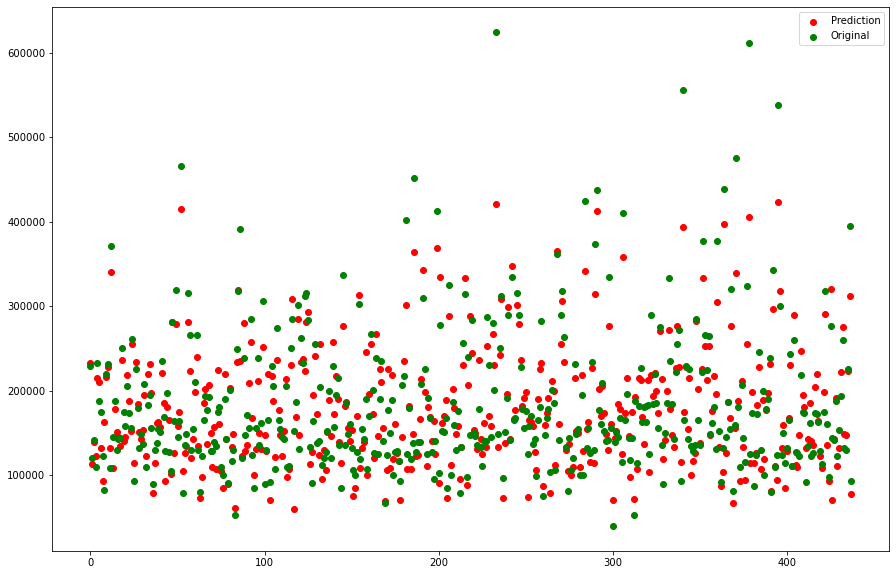

In [94]:
# Scatter Plot
plt.figure(figsize=(15, 10))
plt.scatter(range(len(y_pred)), y_pred, c='r', label='Prediction')
plt.scatter(range(len(y_test)), y_test, c='g', label='Original')
plt.legend()
plt.show()

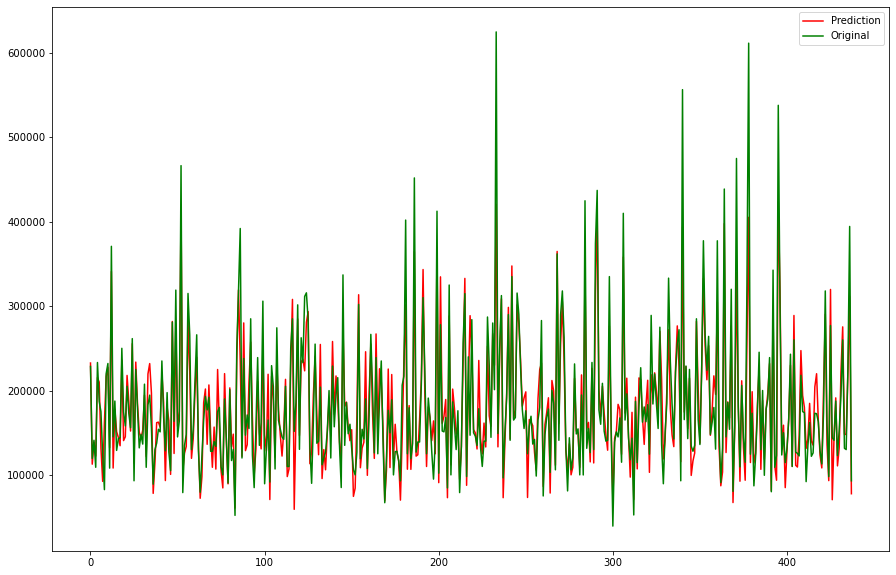

In [95]:
# Line Plot
plt.figure(figsize=(15,10))
plt.plot(y_pred,c='r',label='Prediction')
plt.plot(y_test,c='g',label='Original')
plt.legend()
plt.show()